In [1]:
import joblib
import pandas as pd
import numpy as np

In [2]:
df = pd.read_parquet("dados/dataset_desafio_ramo_direito.parquet")

In [3]:
df.head()

,ramo_direito,texto_bruto
0,[DIREITO TRIBUTÁRIO],ESTADO DP SEECITT\nPREFRITLRA MIUNICICAL SE &x...
1,[DIREITO ADMINISTRATIVO E OUTRAS MATÉRIAS DE D...,B\n\nfpes ein: Une nim tm o\n\n&\n\nquali cada...
2,[DIREITO DO TRABALHO],O\n\nJosé Carlos da Fonseca - in memorian\n\nx...
3,[DIREITO ADMINISTRATIVO E OUTRAS MATÉRIAS DE D...,)\n\n“FORNARI E GAUDÊNCIO | Eme — ——3 Eo ru os...
4,[DIREITO PROCESSUAL CIVIL E DO TRABALHO],a m nu x oreho 9)8e0487) eb\nTay\nPN\n\nESTADO...


In [5]:
# Verificação se não existe dados faltantes
df.isnull().sum()

ramo_direito    0
texto_bruto     0
dtype: int64

In [6]:
# Extraindo informações das labels
ramo = df['ramo_direito'].explode()       
tags_labels = ramo.unique()
len(tags_labels)
ramo

0                                      DIREITO TRIBUTÁRIO
1       DIREITO ADMINISTRATIVO E OUTRAS MATÉRIAS DE DI...
2                                     DIREITO DO TRABALHO
3       DIREITO ADMINISTRATIVO E OUTRAS MATÉRIAS DE DI...
3                                      REGISTROS PÚBLICOS
                              ...                        
9900               DIREITO PROCESSUAL CIVIL E DO TRABALHO
9900                                   DIREITO TRIBUTÁRIO
9901                                   DIREITO TRIBUTÁRIO
9901    DIREITO ADMINISTRATIVO E OUTRAS MATÉRIAS DE DI...
9902                                        DIREITO PENAL
Name: ramo_direito, Length: 13950, dtype: object

In [7]:
# Criando uma função para extrair as labels e tranformar em colunas
def nova_coluna(lista_tags, dataframe, nome_tags):
    for tag in lista_tags:
        coluna = list()
        for linha_tag in dataframe[nome_tags]:
            if tag in linha_tag:
                coluna.append(1)
            else:
                coluna.append(0)
        dataframe[tag] = coluna
nova_coluna(tags_labels, df, "ramo_direito")
df.sample(5)

,ramo_direito,texto_bruto,DIREITO TRIBUTÁRIO,DIREITO ADMINISTRATIVO E OUTRAS MATÉRIAS DE DIREITO PÚBLICO,DIREITO DO TRABALHO,REGISTROS PÚBLICOS,DIREITO PROCESSUAL CIVIL E DO TRABALHO,DIREITO CIVIL,DIREITO DO CONSUMIDOR,DIREITO PROCESSUAL PENAL,...,GRANDE IMPACTO E REPERCUSSÃO,DIREITO PENAL MILITAR,DIREITO AMBIENTAL,DIREITO ELEITORAL,DIREITO À EDUCAÇÃO,DIREITO ASSISTENCIAL,DIREITO PROCESSUAL PENAL MILITAR,DIREITO DA CRIANÇA E DO ADOLESCENTE,DIREITO INTERNACIONAL,DIREITO MARÍTIMO
6239,[DIREITO ADMINISTRATIVO E OUTRAS MATÉRIAS DE D...,Bida de\n\nMINISTÉRIO PÚBLICO DO ESTADO DE SÃO...,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4472,[DIREITO PROCESSUAL CIVIL E DO TRABALHO],mandaliti.\n\nwww. mandaliti.com.br\n\nEXCELEN...,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5886,"[DIREITO PROCESSUAL CIVIL E DO TRABALHO, DIREI...",EXCELENTÍSSIMO SENHOR DOUTOR DESEMBARGADOR FED...,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7705,[DIREITO DO TRABALHO],EXCELENTÍSSIMO SENHOR MINISTRO VICE-PRESIDENTE...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2947,[DIREITO ADMINISTRATIVO E OUTRAS MATÉRIAS DE D...,AVALABNEAs/ A\n\nCRISTINA\n\nEXCELENTÍSSIMO SE...,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Expectativa de treinar este modelo com suporte do cuda futuramente
df.to_csv("dados/tags_transformadas.csv", index=False)

<Axes: >

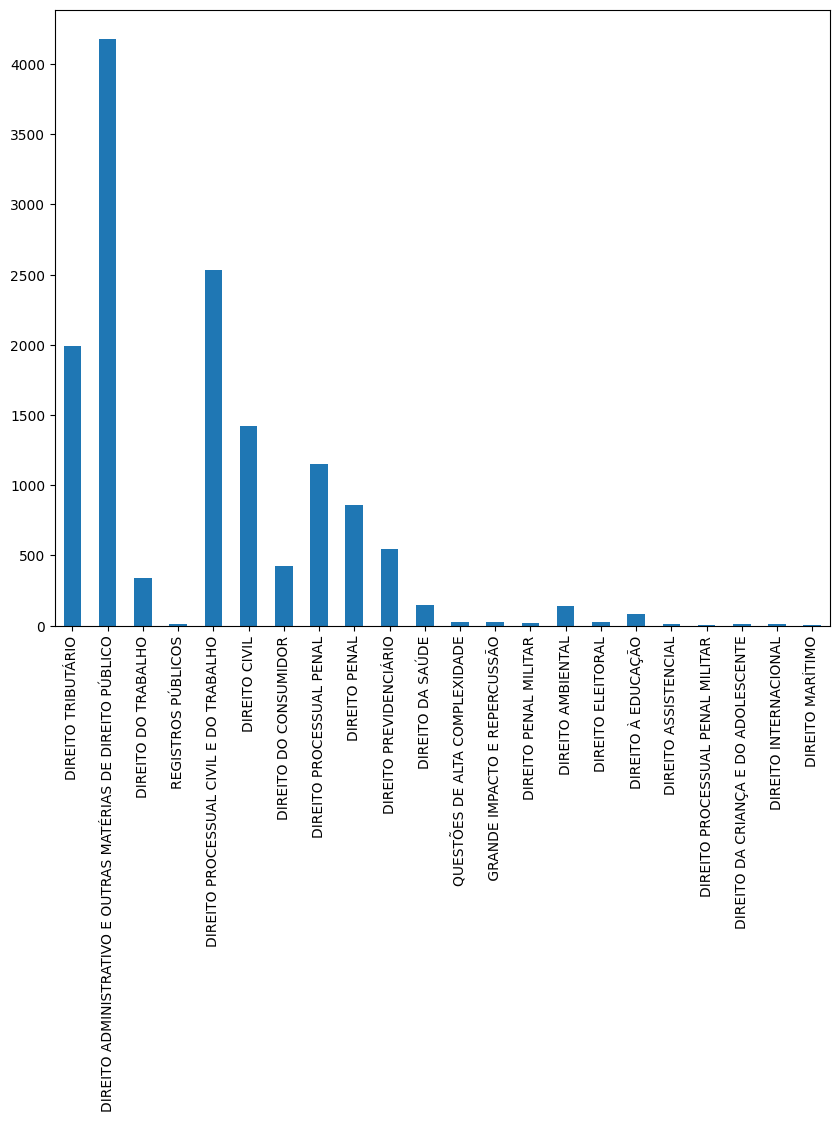

In [9]:
# Olhar a distribuição dos ramos do Direito
import matplotlib.pyplot as plt


ramo_labels = df[tags_labels]

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

ramo_labels.sum(axis=0).plot.bar()

In [10]:
ramo_labels.sum().sort_values()

DIREITO MARÍTIMO                                                  3
DIREITO PROCESSUAL PENAL MILITAR                                  5
REGISTROS PÚBLICOS                                                8
DIREITO DA CRIANÇA E DO ADOLESCENTE                              12
DIREITO INTERNACIONAL                                            12
DIREITO ASSISTENCIAL                                             14
DIREITO PENAL MILITAR                                            19
DIREITO ELEITORAL                                                22
 GRANDE IMPACTO E REPERCUSSÃO                                    23
QUESTÕES DE ALTA COMPLEXIDADE                                    23
DIREITO À EDUCAÇÃO                                               79
DIREITO AMBIENTAL                                               138
DIREITO DA SAÚDE                                                147
DIREITO DO TRABALHO                                             337
DIREITO DO CONSUMIDOR                           

In [11]:
df.columns

Index(['ramo_direito', 'texto_bruto', 'DIREITO TRIBUTÁRIO',
       'DIREITO ADMINISTRATIVO E OUTRAS MATÉRIAS DE DIREITO PÚBLICO',
       'DIREITO DO TRABALHO', 'REGISTROS PÚBLICOS',
       'DIREITO PROCESSUAL CIVIL E DO TRABALHO', 'DIREITO CIVIL',
       'DIREITO DO CONSUMIDOR', 'DIREITO PROCESSUAL PENAL', 'DIREITO PENAL',
       'DIREITO PREVIDENCIÁRIO', 'DIREITO DA SAÚDE',
       'QUESTÕES DE ALTA COMPLEXIDADE', ' GRANDE IMPACTO E REPERCUSSÃO',
       'DIREITO PENAL MILITAR', 'DIREITO AMBIENTAL', 'DIREITO ELEITORAL',
       'DIREITO À EDUCAÇÃO', 'DIREITO ASSISTENCIAL',
       'DIREITO PROCESSUAL PENAL MILITAR',
       'DIREITO DA CRIANÇA E DO ADOLESCENTE', 'DIREITO INTERNACIONAL',
       'DIREITO MARÍTIMO'],
      dtype='object')

In [12]:
# Pegando somente ramos de direito com valores acima de 1000

df = df[['ramo_direito', 'texto_bruto', 'DIREITO ADMINISTRATIVO E OUTRAS MATÉRIAS DE DIREITO PÚBLICO', 'DIREITO PROCESSUAL CIVIL E DO TRABALHO', 'DIREITO TRIBUTÁRIO', 'DIREITO CIVIL', 'DIREITO PROCESSUAL PENAL']]

In [13]:
tags_labels = ['DIREITO ADMINISTRATIVO E OUTRAS MATÉRIAS DE DIREITO PÚBLICO', 'DIREITO PROCESSUAL CIVIL E DO TRABALHO', 'DIREITO TRIBUTÁRIO', 'DIREITO CIVIL', 'DIREITO PROCESSUAL PENAL']

In [14]:
# Craindo uma coluna com todos os ramos do direito envolvendo a linha do texto
lista_zip_ramos = list(zip(df[tags_labels[0]],
                       df[tags_labels[1]],
                       df[tags_labels[2]],
                       df[tags_labels[3]],
                       df[tags_labels[4]],
                    #    df[tags_labels[5]],
                    #    df[tags_labels[6]],
                    #    df[tags_labels[7]],
                    #    df[tags_labels[8]],
                    #    df[tags_labels[9]],
                    #    df[tags_labels[10]],
                    #    df[tags_labels[11]],
                    #    df[tags_labels[12]],
                    #    df[tags_labels[13]],
                    #    df[tags_labels[14]],
                    #    df[tags_labels[15]],
                    #    df[tags_labels[16]],
                    #    df[tags_labels[17]],
                    #    df[tags_labels[18]],
                    #    df[tags_labels[19]],
                    #    df[tags_labels[20]],
                    #    df[tags_labels[21]]                   
                       ))

In [49]:
df['todos_ramos'] = lista_zip_ramos
df.head()

ramo_direito  \
0                                                               [DIREITO TRIBUTÁRIO]   
1                      [DIREITO ADMINISTRATIVO E OUTRAS MATÉRIAS DE DIREITO PÚBLICO]   
2                                                              [DIREITO DO TRABALHO]   
3  [DIREITO ADMINISTRATIVO E OUTRAS MATÉRIAS DE DIREITO PÚBLICO, REGISTROS PÚBLICOS]   
4                                           [DIREITO PROCESSUAL CIVIL E DO TRABALHO]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [16]:
tags_labels

['DIREITO ADMINISTRATIVO E OUTRAS MATÉRIAS DE DIREITO PÚBLICO',
 'DIREITO PROCESSUAL CIVIL E DO TRABALHO',
 'DIREITO TRIBUTÁRIO',
 'DIREITO CIVIL',
 'DIREITO PROCESSUAL PENAL']

In [17]:
# Vou Excluir as linhas que não tem rotulo 

def soma_zero(lista):
    return sum(lista) == 0

df2 = df[~df['todos_ramos'].apply(soma_zero)]

In [18]:
# Vamos salvar o texto em um arquivo txt para melhor observação
teste_texto = df2['texto_bruto'][3]
nome_file = 'dados/texto_bruto.txt'
with open(nome_file, "w") as arquivo:
    arquivo.write(teste_texto)

In [19]:
# dividindo teste e treino
from sklearn.model_selection import train_test_split

textos_treino, textos_teste, ramo_treino, ramo_teste = train_test_split(
    df2['texto_bruto'],
    df2['todos_ramos'],
    test_size= 0.3,
    random_state=42
)

In [20]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import hamming_loss
from skmultilearn.problem_transform import ClassifierChain
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

# Transformando em um array

ramo_treino_array = np.asarray(list(ramo_treino))
ramo_teste_array = np.asarray(list(ramo_teste))

# Criando os modelos para treinamento testaremos 3 modelos e 3 em cadeia
# Pipeline para realizar a vetorização dos textos e treino

# Reg Logistitica
LR_pipeline = Pipeline([('tfidf', TfidfVectorizer(max_features=15000, max_df=0.85, stop_words=stopwords.words('portuguese'))),
                       ('lr_model', OneVsRestClassifier(LogisticRegression(solver = 'lbfgs'), n_jobs=-1))])
# Reg Logistitica em cadeia
LR_pipeline_cadeia = Pipeline([('tfidf', TfidfVectorizer(max_features=15000, max_df=0.85, stop_words=stopwords.words('portuguese'))),
                       ('lr_model_cad', ClassifierChain(LogisticRegression(solver = 'lbfgs')))])
# Modelos NB
NB_pipeline = Pipeline([('tfidf', TfidfVectorizer(max_features=15000, max_df=0.85,stop_words=stopwords.words('portuguese'))),
                       ('nb_model', OneVsRestClassifier(MultinomialNB(), n_jobs=-1))])
# Modelos NB em cadeia
NB_pipeline_cadeia = Pipeline([('tfidf', TfidfVectorizer(max_features=15000, max_df=0.85, stop_words=stopwords.words('portuguese'))),
                       ('nb_model_cad', ClassifierChain(MultinomialNB()))])
# Modelos SVN
SVM_pipeline = Pipeline([('tfidf', TfidfVectorizer(max_features=15000, max_df=0.85, stop_words=stopwords.words('portuguese'))),
                       ('svm_model', OneVsRestClassifier(LinearSVC(), n_jobs=-1))])
# Modelo SVN em cadeia
SVM_pipeline_cadeia = Pipeline([('tfidf', TfidfVectorizer(max_features=5000, max_df=0.85, stop_words=stopwords.words('portuguese'))),
                       ('svm_model_cad', ClassifierChain(LinearSVC()))])

# Função para treinar os modelos    
def treina_modelos(modelo, textos_treino, ramo_treino, textos_teste, ramo_teste):
    modelo.fit(textos_treino, ramo_treino)
    resultado = modelo.score(textos_teste, ramo_teste)
    print("Resultado {0: .2f}%".format(resultado*100))
    previsao = modelo.predict(textos_teste)
    ham_loss_onevsrest = hamming_loss(ramo_teste, previsao)
    print("Hamming Loss: {0: .2f}%".format(ham_loss_onevsrest))


In [21]:
print('#### Modelos LB ####')
treina_modelos(LR_pipeline, textos_treino, ramo_treino_array, textos_teste, ramo_teste_array)
print('#### Modelos LB Cadeia ####')
treina_modelos(LR_pipeline_cadeia, textos_treino, ramo_treino_array, textos_teste, ramo_teste_array)

#### Modelos LB ####
Resultado  64.02%
Hamming Loss:  0.10%
#### Modelos LB Cadeia ####
Resultado  67.17%
Hamming Loss:  0.10%


In [22]:
print('#### Modelos NB ####')
treina_modelos(NB_pipeline, textos_treino, ramo_treino_array, textos_teste, ramo_teste_array)
print('#### Modelos NB Cadeia ####')
treina_modelos(NB_pipeline_cadeia, textos_treino, ramo_treino_array, textos_teste, ramo_teste_array)

#### Modelos NB ####
Resultado  57.72%
Hamming Loss:  0.12%
#### Modelos NB Cadeia ####
Resultado  59.75%
Hamming Loss:  0.12%


In [23]:
print('#### Modelos NB ####')
treina_modelos(SVM_pipeline, textos_treino, ramo_treino_array, textos_teste, ramo_teste_array)
print('#### Modelos NB Cadeia ####')
treina_modelos(SVM_pipeline_cadeia, textos_treino, ramo_treino_array, textos_teste, ramo_teste_array)

#### Modelos NB ####
Resultado  65.48%
Hamming Loss:  0.10%
#### Modelos NB Cadeia ####
Resultado  65.59%
Hamming Loss:  0.11%


In [24]:
# alpha = [0.1,1,10]
# penalty=['l1','l2']
n_gram=[(1,1),(1,2)]
param_grid = {
     'tfidf__ngram_range': n_gram,
     #'lr_model_cad__estimator__C': alpha
 }

gsearch_cv = GridSearchCV(LR_pipeline_cadeia, param_grid=param_grid, cv=3)

In [25]:
gsearch_cv.fit(textos_treino, ramo_treino_array)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(max_df=0.85,
                                                        max_features=15000,
                                                        stop_words=['a', 'à',
                                                                    'ao', 'aos',
                                                                    'aquela',
                                                                    'aquelas',
                                                                    'aquele',
                                                                    'aqueles',
                                                                    'aquilo',
                                                                    'as', 'às',
                                                                    'até',
                                                                    'com',
                                                                    'como',
                                                                    'da', 'das',
                                                                    'de',
                                                                    'dela',
                                                                    'delas',
                                                                    'dele',
                                                                    'deles',
                                                                    'depois',
                                                                    'do', 'dos',
                                                                    'e', 'é',
                                                                    'ela',
                                                                    'elas',
                                                                    'ele',
                                                                    'eles', ...])),
                                       ('lr_model_cad',
                                        ClassifierChain(classifier=LogisticRegression(),
                                                        require_dense=[True,
                                                                       True]))]),
             param_grid={'tfidf__ngram_range': [(1, 1), (1, 2)]})

In [26]:
gsearch_cv.best_score_

0.6646333707444818

In [27]:
gsearch_cv.best_params_

{'tfidf__ngram_range': (1, 2)}

In [28]:
# Validando o melhor estimador 

LR_pipeline_cadeia = Pipeline([('tfidf', TfidfVectorizer(max_features=15000, max_df=0.85, ngram_range=(1,1), stop_words=stopwords.words('portuguese'))),
                       ('lr_model_cad', ClassifierChain(LogisticRegression(solver = 'lbfgs')))])
print('#### Modelos LB Cadeia ####')
treina_modelos(LR_pipeline_cadeia, textos_treino, ramo_treino_array, textos_teste, ramo_teste_array)

#### Modelos LB Cadeia ####
Resultado  67.17%
Hamming Loss:  0.10%


In [83]:
# Funcao para testar o modelo


def busca_tag(id):
    texto = df2['texto_bruto'][id]
    ramo_r = df2['ramo_direito'][id]
    lista_prev = LR_pipeline_cadeia.predict([texto]).toarray()
    dados_bs = { 'ramo' : tags_labels,
                 'valores' : lista_prev[0]
                 }
    df = pd.DataFrame.from_dict(dados_bs)
    previsao = df[df['valores'] == 1.0]['ramo'].tolist()
    
    return {
            'previsao': previsao,
            'ramo_real': ramo_r[0],
            'texto': texto
        }
        
    

busca_tag(50)
    

{'previsao': ['DIREITO ADMINISTRATIVO E OUTRAS MATÉRIAS DE DIREITO PÚBLICO'],
 'ramo_real': 'DIREITO ADMINISTRATIVO E OUTRAS MATÉRIAS DE DIREITO PÚBLICO',
 'texto': 'EXCELENTÍSSIMO SENHOR PRESIDENTE DO EGRÉGIO TRIBUNAL DE JUSTIÇA DO\n\nESTADO DE SERGIPE.\n\nTEROCUM TORT CENE NINE\n\n$2 ARACAJU\n\nPROCURADORIA GERAL - PGM\n\nMANDADO DE SEGURANCA 31.680 DISTRITO\nFEDERAL. PRINCÍPIO DA LEGALIDADE.\nPOSTULADO TEMPUS REGIT ACTUM, DE TODO\nAPLICÁVEL À ADMINISTRAÇÃO PÚBLICA. LEI\nCOMPLEMENTAR MUNICIPAL NÃO TEM O\nCONDÃO DE RETROAGIR PARA BENEFICIAR O\nSERVIDOR. REFORMA DA DECISÃO É MEDIDA\n\nQUE SE IMPÕE.\n\nRECURSO EXTRAORDINÁRIO NA APELAÇÃO CÍVEL Nº 202200815227\nRECORRENTE: MUNICÍPIO DE ARACAJU\n\nRECORRIDO: NANCI AGUIAR TELES CAVALCANTE\n\nMUNICÍPIO DE ARACAJU, já devidamente qualificado, por seu procurador\n\nex lege, infra-assinado, vem, respeitosamente perante esta Colenda Turma Recursal, em\n\nrazão de decisão proferida nos autos da Apelação Cível n. 202200815227, interpor\n\nRECURSO 

In [40]:
# Salvando o modelo
import joblib
joblib.dump(LR_pipeline_cadeia, 'LR_pipeline_cadeia.joblib')


['LR_pipeline_cadeia.joblib']